In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers as optimizers
import keras.activations as activs
from keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

plt.rc('axes', axisbelow=True)

# создание тренировочной и тестовой выборок
def prepare_dataset(file_path):
    test_size = 0.2
    pd_data = pd.read_csv(file_path)
    X_all = pd_data.iloc[:, :-1].to_numpy()
    Y_all = LabelEncoder().fit_transform(pd_data.iloc[:, -1].to_numpy())
    
    X_tr, X_t, Y_tr, Y_t = train_test_split(X_all, Y_all, test_size=test_size, shuffle=True)
    
    return X_tr, Y_tr, X_t, Y_t, pd_data

#
def plot_points(data):
    colors = ['red', 'blue', 'green']
    classes = np.unique(data.iloc[:, -1])
    for idx, _ in enumerate(classes):
        plt.scatter(x=data[data.iloc[:, -1] == classes[idx]].iloc[:, 0], 
                    y=data[data.iloc[:, -1] == classes[idx]].iloc[:, 1], 
                    color=colors[idx])
    plt.title('Визуализация данных')
    plt.grid(True)
    plt.show()

Using TensorFlow backend.


In [7]:
# Задание 1. 
# Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv.
# Насколько отличается результат обучения и почему? Сколько потребовалось эпох для обучения?
# Попробуйте различные функции активации и оптимизаторы. 

# оптимизаторы
optims = [ 'sgd', 'adagrad', 'adadelta','adam', 'rmsprop' ] 

# функции активации
activations = [ 'softmax', 'tanh', 'relu', 'sigmoid', 'softplus' ]

max_epochs = 50

X, Y,  X_t, Y_t, _ = prepare_dataset('nn_0.csv')

for opt in optims:
    for act in activations:
        print(f'\nOptimizer: {opt}, activation: {act}')
        model_n_0 = Sequential()
        model_n_0.add(Dense(1, input_dim=2, activation=act))
        model_n_0.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
        
        for ep in range(max_epochs ):
            model_n_0.fit(X, Y, initial_epoch=ep, epochs=ep+1, batch_size=4)
            scores = model_n_0.evaluate(X_t, Y_t)
            print(f'Accuracy: {scores[1]:.3}')
            
        



Optimizer: sgd, activation: softmax
Epoch 1/1
20/20 [==============================] - 0s 760us/step
Accuracy: 0.5
Epoch 2/2
20/20 [==============================] - 0s 257us/step
Accuracy: 0.5
Epoch 3/3
20/20 [==============================] - 0s 226us/step
Accuracy: 0.5
Epoch 4/4
20/20 [==============================] - 0s 145us/step
Accuracy: 0.5
Epoch 5/5
20/20 [==============================] - 0s 143us/step
Accuracy: 0.5
Epoch 6/6
20/20 [==============================] - 0s 88us/step
Accuracy: 0.5
Epoch 7/7
20/20 [==============================] - 0s 95us/step
Accuracy: 0.5
Epoch 8/8
20/20 [==============================] - 0s 138us/step
Accuracy: 0.5
Epoch 9/9
20/20 [==============================] - 0s 61us/step
Accuracy: 0.5
Epoch 10/10
20/20 [==============================] - 0s 125us/step
Accuracy: 0.5
Epoch 11/11
20/20 [==============================] - 0s 97us/step
Accuracy: 0.5
Epoch 12/12
20/20 [==============================] - 0s 106us/step
Accuracy: 0.5
Epoch 13/13
2

20/20 [==============================] - 0s 52us/step
Accuracy: 1.0
Epoch 48/48
20/20 [==============================] - 0s 44us/step
Accuracy: 1.0
Epoch 49/49
20/20 [==============================] - 0s 37us/step
Accuracy: 1.0
Epoch 50/50
20/20 [==============================] - 0s 156us/step
Accuracy: 1.0

Optimizer: sgd, activation: relu
Epoch 1/1
20/20 [==============================] - 0s 609us/step
Accuracy: 0.5
Epoch 2/2
20/20 [==============================] - 0s 49us/step
Accuracy: 0.5
Epoch 3/3
20/20 [==============================] - 0s 78us/step
Accuracy: 0.55
Epoch 4/4
20/20 [==============================] - 0s 44us/step
Accuracy: 0.55
Epoch 5/5
20/20 [==============================] - 0s 33us/step
Accuracy: 0.6
Epoch 6/6
20/20 [==============================] - 0s 126us/step
Accuracy: 0.7
Epoch 7/7
20/20 [==============================] - 0s 39us/step
Accuracy: 0.7
Epoch 8/8
20/20 [==============================] - 0s 38us/step
Accuracy: 0.7
Epoch 9/9
20/20 [============

20/20 [==============================] - 0s 104us/step
Accuracy: 1.0
Epoch 44/44
20/20 [==============================] - 0s 29us/step
Accuracy: 1.0
Epoch 45/45
20/20 [==============================] - 0s 88us/step
Accuracy: 1.0
Epoch 46/46
20/20 [==============================] - 0s 217us/step
Accuracy: 1.0
Epoch 47/47
20/20 [==============================] - 0s 27us/step
Accuracy: 1.0
Epoch 48/48
20/20 [==============================] - 0s 26us/step
Accuracy: 1.0
Epoch 49/49
20/20 [==============================] - 0s 34us/step
Accuracy: 1.0
Epoch 50/50
20/20 [==============================] - 0s 470us/step
Accuracy: 1.0

Optimizer: sgd, activation: softplus
Epoch 1/1
20/20 [==============================] - 0s 592us/step
Accuracy: 0.45
Epoch 2/2
20/20 [==============================] - 0s 37us/step
Accuracy: 0.45
Epoch 3/3
20/20 [==============================] - 0s 84us/step
Accuracy: 0.45
Epoch 4/4
20/20 [==============================] - 0s 34us/step
Accuracy: 0.5
Epoch 5/5
20/20

20/20 [==============================] - 0s 74us/step
Accuracy: 0.5
Epoch 40/40
20/20 [==============================] - 0s 62us/step
Accuracy: 0.5
Epoch 41/41
20/20 [==============================] - 0s 33us/step
Accuracy: 0.5
Epoch 42/42
20/20 [==============================] - 0s 30us/step
Accuracy: 0.5
Epoch 43/43
20/20 [==============================] - 0s 47us/step
Accuracy: 0.5
Epoch 44/44
20/20 [==============================] - 0s 43us/step
Accuracy: 0.5
Epoch 45/45
20/20 [==============================] - 0s 155us/step
Accuracy: 0.5
Epoch 46/46
20/20 [==============================] - 0s 177us/step
Accuracy: 0.5
Epoch 47/47
20/20 [==============================] - 0s 84us/step
Accuracy: 0.5
Epoch 48/48
20/20 [==============================] - 0s 94us/step
Accuracy: 0.5
Epoch 49/49
20/20 [==============================] - 0s 40us/step
Accuracy: 0.5
Epoch 50/50
20/20 [==============================] - 0s 34us/step
Accuracy: 0.5

Optimizer: adagrad, activation: tanh
Epoch 1/1
20

20/20 [==============================] - 0s 33us/step
Accuracy: 0.5
Epoch 36/36
20/20 [==============================] - 0s 341us/step
Accuracy: 0.5
Epoch 37/37
20/20 [==============================] - 0s 46us/step
Accuracy: 0.5
Epoch 38/38
20/20 [==============================] - 0s 44us/step
Accuracy: 0.5
Epoch 39/39
20/20 [==============================] - 0s 51us/step
Accuracy: 0.5
Epoch 40/40
20/20 [==============================] - 0s 206us/step
Accuracy: 0.5
Epoch 41/41
20/20 [==============================] - 0s 77us/step
Accuracy: 0.5
Epoch 42/42
20/20 [==============================] - 0s 65us/step
Accuracy: 0.5
Epoch 43/43
20/20 [==============================] - 0s 79us/step
Accuracy: 0.5
Epoch 44/44
20/20 [==============================] - 0s 145us/step
Accuracy: 0.5
Epoch 45/45
20/20 [==============================] - 0s 35us/step
Accuracy: 0.5
Epoch 46/46
20/20 [==============================] - 0s 66us/step
Accuracy: 0.5
Epoch 47/47
20/20 [==============================

20/20 [==============================] - 0s 87us/step
Accuracy: 0.95
Epoch 34/34
20/20 [==============================] - 0s 321us/step
Accuracy: 0.95
Epoch 35/35
20/20 [==============================] - 0s 226us/step
Accuracy: 0.95
Epoch 36/36
20/20 [==============================] - 0s 92us/step
Accuracy: 0.95
Epoch 37/37
20/20 [==============================] - 0s 62us/step
Accuracy: 0.95
Epoch 38/38
20/20 [==============================] - 0s 43us/step
Accuracy: 0.95
Epoch 39/39
20/20 [==============================] - 0s 30us/step
Accuracy: 0.95
Epoch 40/40
20/20 [==============================] - 0s 162us/step
Accuracy: 0.95
Epoch 41/41
20/20 [==============================] - 0s 41us/step
Accuracy: 0.95
Epoch 42/42
20/20 [==============================] - 0s 122us/step
Accuracy: 0.95
Epoch 43/43
20/20 [==============================] - 0s 82us/step
Accuracy: 0.95
Epoch 44/44
20/20 [==============================] - 0s 42us/step
Accuracy: 0.95
Epoch 45/45
20/20 [=================

20/20 [==============================] - 0s 56us/step
Accuracy: 0.5
Epoch 30/30
20/20 [==============================] - 0s 100us/step
Accuracy: 0.5
Epoch 31/31
20/20 [==============================] - 0s 34us/step
Accuracy: 0.5
Epoch 32/32
20/20 [==============================] - 0s 189us/step
Accuracy: 0.5
Epoch 33/33
20/20 [==============================] - 0s 43us/step
Accuracy: 0.5
Epoch 34/34
20/20 [==============================] - 0s 189us/step
Accuracy: 0.5
Epoch 35/35
20/20 [==============================] - 0s 32us/step
Accuracy: 0.5
Epoch 36/36
20/20 [==============================] - 0s 79us/step
Accuracy: 0.5
Epoch 37/37
20/20 [==============================] - 0s 49us/step
Accuracy: 0.5
Epoch 38/38
20/20 [==============================] - 0s 32us/step
Accuracy: 0.5
Epoch 39/39
20/20 [==============================] - 0s 34us/step
Accuracy: 0.5
Epoch 40/40
20/20 [==============================] - 0s 32us/step
Accuracy: 0.5
Epoch 41/41
20/20 [==============================

20/20 [==============================] - 0s 56us/step
Accuracy: 0.75
Epoch 26/26
20/20 [==============================] - 0s 51us/step
Accuracy: 0.75
Epoch 27/27
20/20 [==============================] - 0s 36us/step
Accuracy: 0.85
Epoch 28/28
20/20 [==============================] - 0s 60us/step
Accuracy: 0.9
Epoch 29/29
20/20 [==============================] - 0s 43us/step
Accuracy: 0.9
Epoch 30/30
20/20 [==============================] - 0s 110us/step
Accuracy: 0.9
Epoch 31/31
20/20 [==============================] - 0s 48us/step
Accuracy: 0.9
Epoch 32/32
20/20 [==============================] - 0s 46us/step
Accuracy: 0.9
Epoch 33/33
20/20 [==============================] - 0s 312us/step
Accuracy: 0.95
Epoch 34/34
20/20 [==============================] - 0s 156us/step
Accuracy: 0.95
Epoch 35/35
20/20 [==============================] - 0s 50us/step
Accuracy: 0.95
Epoch 36/36
20/20 [==============================] - 0s 52us/step
Accuracy: 0.95
Epoch 37/37
20/20 [=======================

Accuracy: 0.3
Epoch 21/21
20/20 [==============================] - 0s 111us/step
Accuracy: 0.3
Epoch 22/22
20/20 [==============================] - 0s 122us/step
Accuracy: 0.3
Epoch 23/23
20/20 [==============================] - 0s 322us/step
Accuracy: 0.3
Epoch 24/24
20/20 [==============================] - 0s 123us/step
Accuracy: 0.3
Epoch 25/25
20/20 [==============================] - 0s 95us/step
Accuracy: 0.3
Epoch 26/26
20/20 [==============================] - 0s 96us/step
Accuracy: 0.3
Epoch 27/27
20/20 [==============================] - 0s 41us/step
Accuracy: 0.3
Epoch 28/28
20/20 [==============================] - 0s 126us/step
Accuracy: 0.3
Epoch 29/29
20/20 [==============================] - 0s 48us/step
Accuracy: 0.3
Epoch 30/30
20/20 [==============================] - 0s 30us/step
Accuracy: 0.3
Epoch 31/31
20/20 [==============================] - 0s 36us/step
Accuracy: 0.3
Epoch 32/32
20/20 [==============================] - 0s 41us/step
Accuracy: 0.35
Epoch 33/33
20/20 [=

Accuracy: 0.5
Epoch 19/19
20/20 [==============================] - 0s 58us/step
Accuracy: 0.5
Epoch 20/20
20/20 [==============================] - 0s 185us/step
Accuracy: 0.5
Epoch 21/21
20/20 [==============================] - 0s 55us/step
Accuracy: 0.5
Epoch 22/22
20/20 [==============================] - 0s 62us/step
Accuracy: 0.5
Epoch 23/23
20/20 [==============================] - 0s 40us/step
Accuracy: 0.5
Epoch 24/24
20/20 [==============================] - 0s 34us/step
Accuracy: 0.5
Epoch 25/25
20/20 [==============================] - 0s 219us/step
Accuracy: 0.5
Epoch 26/26
20/20 [==============================] - 0s 332us/step
Accuracy: 0.5
Epoch 27/27
20/20 [==============================] - 0s 46us/step
Accuracy: 0.5
Epoch 28/28
20/20 [==============================] - 0s 119us/step
Accuracy: 0.5
Epoch 29/29
20/20 [==============================] - 0s 139us/step
Accuracy: 0.5
Epoch 30/30
20/20 [==============================] - 0s 122us/step
Accuracy: 0.5
Epoch 31/31
20/20 [=

Accuracy: 0.0
Epoch 17/17
20/20 [==============================] - 0s 130us/step
Accuracy: 0.0
Epoch 18/18
20/20 [==============================] - 0s 33us/step
Accuracy: 0.0
Epoch 19/19
20/20 [==============================] - 0s 41us/step
Accuracy: 0.0
Epoch 20/20
20/20 [==============================] - 0s 42us/step
Accuracy: 0.0
Epoch 21/21
20/20 [==============================] - 0s 30us/step
Accuracy: 0.0
Epoch 22/22
20/20 [==============================] - 0s 78us/step
Accuracy: 0.0
Epoch 23/23
20/20 [==============================] - 0s 180us/step
Accuracy: 0.0
Epoch 24/24
20/20 [==============================] - 0s 68us/step
Accuracy: 0.0
Epoch 25/25
20/20 [==============================] - 0s 306us/step
Accuracy: 0.0
Epoch 26/26
20/20 [==============================] - 0s 29us/step
Accuracy: 0.0
Epoch 27/27
20/20 [==============================] - 0s 59us/step
Accuracy: 0.05
Epoch 28/28
20/20 [==============================] - 0s 92us/step
Accuracy: 0.1
Epoch 29/29
20/20 [===

20/20 [==============================] - 0s 52us/step
Accuracy: 0.8
Epoch 13/13
20/20 [==============================] - 0s 33us/step
Accuracy: 0.8
Epoch 14/14
20/20 [==============================] - 0s 150us/step
Accuracy: 0.8
Epoch 15/15
20/20 [==============================] - 0s 36us/step
Accuracy: 0.85
Epoch 16/16
20/20 [==============================] - 0s 139us/step
Accuracy: 0.85
Epoch 17/17
20/20 [==============================] - 0s 458us/step
Accuracy: 0.85
Epoch 18/18
20/20 [==============================] - 0s 60us/step
Accuracy: 0.9
Epoch 19/19
20/20 [==============================] - 0s 178us/step
Accuracy: 0.9
Epoch 20/20
20/20 [==============================] - 0s 57us/step
Accuracy: 0.9
Epoch 21/21
20/20 [==============================] - 0s 110us/step
Accuracy: 0.9
Epoch 22/22
20/20 [==============================] - 0s 135us/step
Accuracy: 0.9
Epoch 23/23
20/20 [==============================] - 0s 42us/step
Accuracy: 0.9
Epoch 24/24
20/20 [========================

Accuracy: 0.5
Epoch 8/8
20/20 [==============================] - 0s 48us/step
Accuracy: 0.5
Epoch 9/9
20/20 [==============================] - 0s 36us/step
Accuracy: 0.5
Epoch 10/10
20/20 [==============================] - 0s 30us/step
Accuracy: 0.5
Epoch 11/11
20/20 [==============================] - 0s 111us/step
Accuracy: 0.5
Epoch 12/12
20/20 [==============================] - 0s 115us/step
Accuracy: 0.5
Epoch 13/13
20/20 [==============================] - 0s 28us/step
Accuracy: 0.5
Epoch 14/14
20/20 [==============================] - 0s 32us/step
Accuracy: 0.5
Epoch 15/15
20/20 [==============================] - 0s 180us/step
Accuracy: 0.5
Epoch 16/16
20/20 [==============================] - 0s 52us/step
Accuracy: 0.5
Epoch 17/17
20/20 [==============================] - 0s 155us/step
Accuracy: 0.5
Epoch 18/18
20/20 [==============================] - 0s 32us/step
Accuracy: 0.5
Epoch 19/19
20/20 [==============================] - 0s 30us/step
Accuracy: 0.5
Epoch 20/20
20/20 [=======

20/20 [==============================] - 0s 70us/step
Accuracy: 0.0
Epoch 5/5
20/20 [==============================] - 0s 31us/step
Accuracy: 0.0
Epoch 6/6
20/20 [==============================] - 0s 147us/step
Accuracy: 0.0
Epoch 7/7
20/20 [==============================] - 0s 88us/step
Accuracy: 0.0
Epoch 8/8
20/20 [==============================] - 0s 113us/step
Accuracy: 0.0
Epoch 9/9
20/20 [==============================] - 0s 95us/step
Accuracy: 0.0
Epoch 10/10
20/20 [==============================] - 0s 214us/step
Accuracy: 0.0
Epoch 11/11
20/20 [==============================] - 0s 50us/step
Accuracy: 0.0
Epoch 12/12
20/20 [==============================] - 0s 84us/step
Accuracy: 0.0
Epoch 13/13
20/20 [==============================] - 0s 40us/step
Accuracy: 0.0
Epoch 14/14
20/20 [==============================] - 0s 64us/step
Accuracy: 0.0
Epoch 15/15
20/20 [==============================] - 0s 347us/step
Accuracy: 0.0
Epoch 16/16
20/20 [==============================] - 0s 61

20/20 [==============================] - 0s 76us/step
Accuracy: 1.0

Optimizer: rmsprop, activation: softplus
Epoch 1/1
20/20 [==============================] - 0s 531us/step
Accuracy: 0.75
Epoch 2/2
20/20 [==============================] - 0s 30us/step
Accuracy: 0.85
Epoch 3/3
20/20 [==============================] - 0s 32us/step
Accuracy: 0.9
Epoch 4/4
20/20 [==============================] - 0s 48us/step
Accuracy: 1.0
Epoch 5/5
20/20 [==============================] - 0s 131us/step
Accuracy: 1.0
Epoch 6/6
20/20 [==============================] - 0s 174us/step
Accuracy: 1.0
Epoch 7/7
20/20 [==============================] - 0s 114us/step
Accuracy: 1.0
Epoch 8/8
20/20 [==============================] - 0s 158us/step
Accuracy: 1.0
Epoch 9/9
20/20 [==============================] - 0s 125us/step
Accuracy: 1.0
Epoch 10/10
20/20 [==============================] - 0s 108us/step
Accuracy: 1.0
Epoch 11/11
20/20 [==============================] - 0s 39us/step
Accuracy: 1.0
Epoch 12/12
20/20 [

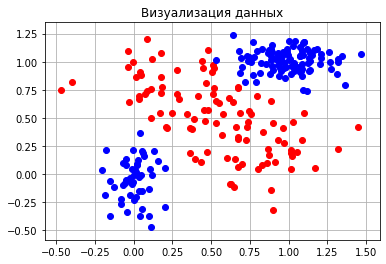

-50

In [9]:
dat1 = pd.read_csv('nn_1.csv')
plot_points(dat1)

len(dat1[dat1['class'] == -1]) - len(dat1[dat1['class'] == 1])

In [11]:
# поменяем модель. и проделаем всё заново

max_epochs = 100

X, Y,  X_t, Y_t, _ = prepare_dataset('nn_1.csv')

model_n_0 = Sequential([
    Dense(3, input_dim=2, activation='tanh'),
    Dense(2, activation='tanh'),
    Dense(1, activation='tanh')
])
model_n_0.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
        
for ep in range(max_epochs ):
    model_n_0.fit(X, Y, initial_epoch=ep, epochs=ep+1, batch_size=4)
    scores = model_n_0.evaluate(X_t, Y_t)
    print(f'Accuracy: {scores[1]:.3}')
            

Epoch 1/1
50/50 [==============================] - 0s 692us/step
Accuracy: 0.4
Epoch 2/2
50/50 [==============================] - 0s 95us/step
Accuracy: 0.4
Epoch 3/3
50/50 [==============================] - 0s 150us/step
Accuracy: 0.48
Epoch 4/4
50/50 [==============================] - 0s 121us/step
Accuracy: 0.64
Epoch 5/5
50/50 [==============================] - 0s 43us/step
Accuracy: 0.48
Epoch 6/6
50/50 [==============================] - 0s 79us/step
Accuracy: 0.48
Epoch 7/7
50/50 [==============================] - 0s 118us/step
Accuracy: 0.5
Epoch 8/8
50/50 [==============================] - 0s 55us/step
Accuracy: 0.52
Epoch 9/9
50/50 [==============================] - 0s 35us/step
Accuracy: 0.56
Epoch 10/10
50/50 [==============================] - 0s 116us/step
Accuracy: 0.58
Epoch 11/11
50/50 [==============================] - 0s 108us/step
Accuracy: 0.62
Epoch 12/12
50/50 [==============================] - 0s 261us/step
Accuracy: 0.62
Epoch 13/13
50/50 [=======================

50/50 [==============================] - 0s 80us/step
Accuracy: 0.94
Epoch 97/97
50/50 [==============================] - 0s 175us/step
Accuracy: 0.94
Epoch 98/98
50/50 [==============================] - 0s 99us/step
Accuracy: 0.96
Epoch 99/99
50/50 [==============================] - 0s 102us/step
Accuracy: 0.98
Epoch 100/100
50/50 [==============================] - 0s 72us/step
Accuracy: 0.94


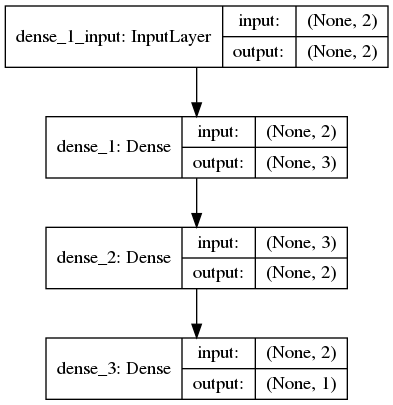

In [5]:
plot_model(model_n_0, show_shapes=True)

In [8]:
# 3. MNIST.
# Создайте классификатор на базе нейронной сети для набора данных MNIST (так же можно загрузить с помощью
# torchvision.datasets.MNIST, tensorflow.keras.datasets.mnist.load_data и пр.). Оцените качество классификации.

from keras.datasets import mnist
from keras.utils import to_categorical

num_classes = 10
max_epochs = 20


(X, Y), (X_t, Y_t) = mnist.load_data()
num_pix = 28 * 28

# обработка данных. нормализация
X = X / 255.
X = X.reshape(len(X), num_pix)
X_t = X_t / 255.
X_t = X_t.reshape(len(X_t), num_pix)
# приведение номеров классов в унарную позиционную(?) запись
Y = to_categorical(Y, num_classes)
Y_t = to_categorical(Y_t, num_classes)

In [12]:
mnist_model = Sequential([
    Dense(num_pix, input_shape=(num_pix, ), activation='sigmoid'),
    Dense(196, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
mnist_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 196)               153860    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1970      
Total params: 771,270
Trainable params: 771,270
Non-trainable params: 0
_________________________________________________________________


In [13]:
mnist_model.fit(X, Y, batch_size=128, epochs=max_epochs, validation_data=(X_t, Y_t))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.5104 - accuracy: 0.8608 - val_loss: 0.2460 - val_accuracy: 0.9258
Epoch 2/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2092 - accuracy: 0.9363 - val_loss: 0.1718 - val_accuracy: 0.9489
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1494 - accuracy: 0.9549 - val_loss: 0.1492 - val_accuracy: 0.9558
Epoch 4/20
60000/60000 [==============================] - 22s 360us/step - loss: 0.1117 - accuracy: 0.9656 - val_loss: 0.1071 - val_accuracy: 0.9672
Epoch 5/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 0.0906 - val_accuracy: 0.9720
Epoch 6/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0696 - accuracy: 0.9788 - val_loss: 0.0768 - val_accuracy: 0.9756
Epoch 7/20
60000/60000 [==============================] 

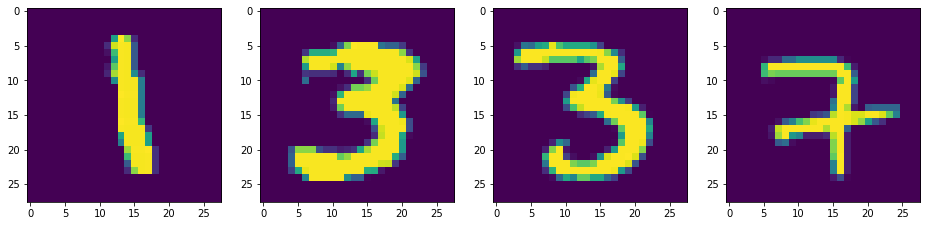

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.imshow(X[6])
ax2.imshow(X[27])
ax3.imshow(X[12])
ax4.imshow(X[38])
plt.show()

In [11]:
Y[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7204844560492574281
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12436942735414950501
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8140447615978618428
physical_device_desc: "device: XLA_GPU device"
]


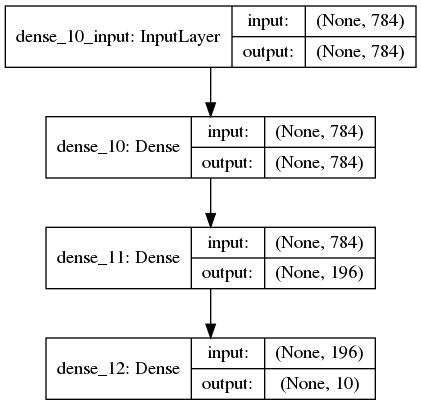

In [14]:
plot_model(mnist_model, show_shapes=True)

In [20]:
from sklearn.metrics import confusion_matrix

conf_matr = pd.DataFrame(confusion_matrix(Y_t.argmax(axis=1), mnist_model.predict(X_t).argmax(axis=1)))
conf_matr

,0,1,2,3,4,5,6,7,8,9
0,971,0,0,1,1,2,3,0,1,1
1,0,1128,1,0,0,1,2,1,2,0
2,2,0,1018,2,1,0,2,3,4,0
3,0,1,1,997,0,2,0,2,1,6
4,0,1,0,1,951,0,7,2,0,20
5,1,0,0,7,1,880,1,0,1,1
6,3,2,2,0,1,6,943,0,1,0
7,0,4,7,0,1,1,0,1005,4,6
8,2,0,2,4,0,7,1,3,949,6
9,0,3,0,2,2,7,0,1,0,994
